# Preprocess geographical data

This preprocesses geographic data.

In [1]:
import os

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np

## Preprocess region and department shape



In [3]:
# insee / CP + commune boundaries
geo = gpd.read_file('../data/code-postal-code-insee-2015/code-postal-code-insee-2015.shp')  

In [4]:
geo.nom_reg.unique()

array(['BRETAGNE', 'AUVERGNE-RHONE-ALPES',
       'ALSACE-CHAMPAGNE-ARDENNE-LORRAINE', 'BOURGOGNE-FRANCHE-COMTE',
       'AQUITAINE-LIMOUSIN-POITOU-CHARENTES',
       "PROVENCE-ALPES-COTE D'AZUR", 'NORD-PAS-DE-CALAIS-PICARDIE',
       'LANGUEDOC-ROUSSILLON-MIDI-PYRENEES', 'CENTRE-VAL DE LOIRE',
       'NORMANDIE', 'PAYS DE LA LOIRE', 'CORSE', 'ILE-DE-FRANCE',
       'REUNION', 'GUADELOUPE', 'MARTINIQUE', 'MAYOTTE', 'GUYANE'],
      dtype=object)

In [5]:
# switch to a nicer projection
geo = geo.to_crs(epsg=3857)

In [6]:
geo = geo.drop_duplicates('insee_com')

In [8]:
geo_dept = geo[['code_dept', 'nom_dept', 'code_reg', 'nom_reg', 'geometry']].dissolve(by='code_dept').reset_index()
geo_dept["geo_level"]="DPT"
geo_dept["name"] = geo_dept["nom_dept"]
geo_dept["code"] = geo_dept["code_dept"]

In [9]:
geo_reg = geo[['code_reg', 'nom_reg', 'geometry']].dissolve(by='code_reg').reset_index()
geo_reg["geo_level"]="REG"
geo_reg["name"] = geo_reg["nom_reg"]
geo_reg["code"] = geo_reg["code_reg"]

In [10]:
geo_dept["geo_level"]="DPT"
geo_reg["geo_level"]="REG"

In [11]:
geo_out = geo_reg.append(geo_dept)
geo_out["ISO3_CODE"] = "FRA"

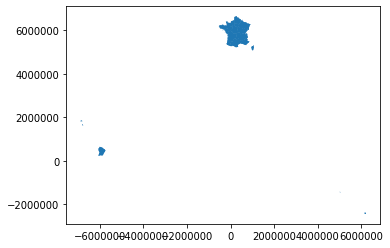

In [12]:
geo_out.plot()

## European shape data

In [13]:
geo_eur = gpd.read_file('../data/ref-countries-2016-20m/CNTR_RG_20M_2016_3857.shp') 

In [14]:
geo_eur["name"] = geo_eur["NAME_ENGL"]
geo_eur = geo_eur[["name", "ISO3_CODE", "geometry"]]
geo_eur["code"] = geo_eur["ISO3_CODE"]
geo_eur["geo_level"] = "CNTRY"

(-5000000.0, 12000000.0)

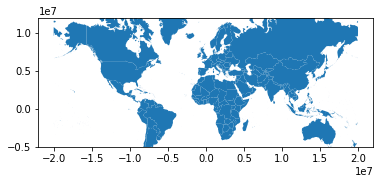

In [15]:
ax = geo_eur.plot()
ax.set_ylim(-0.5e7,1.2e7)

## Output processed data

In [16]:
geo_out = geo_out.append(geo_eur)

In [37]:
# save to shapefile
data_path = "../data/processed/geo"
processed_file = "covid19model_zones.shp"

if not os.path.exists(data_path):
    os.makedirs(data_path)
    
geo_out[[
    'name', 'code', 'geo_level', 'ISO3_CODE', 'geometry',
]].to_file(os.path.join(data_path, processed_file))

In [34]:
data_path

'data/processed'